In [4]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
df = pd.read_csv('lbp-test.csv')
print(f"Colunas do CSV: {df.columns}")

Colunas do CSV: Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9', 'attribute10',
       'attribute11', 'attribute12', 'attribute13', 'attribute14',
       'attribute15', 'attribute16', 'attribute17', 'attribute18',
       'attribute19', 'attribute20', 'attribute21', 'attribute22',
       'attribute23', 'attribute24', 'attribute25', 'attribute26',
       'attribute27', 'attribute28', 'attribute29', 'attribute30',
       'attribute31', 'attribute32', 'attribute33', 'attribute34',
       'attribute35', 'attribute36', 'attribute37', 'attribute38',
       'attribute39', 'attribute40', 'attribute41', 'attribute42',
       'attribute43', 'attribute44', 'attribute45', 'attribute46',
       'attribute47', 'attribute48', 'attribute49', 'attribute50',
       'attribute51', 'attribute52', 'attribute53', 'attribute54',
       'attribute55', 'attribute56', 'attribute57', 'attribute58',
       'attribute59', 'cl

In [6]:
# Carregar e combinar os folds de treinamento
folds = [pd.read_csv(f'lbp-train-fold_{i}.csv') for i in range(4)]
df_train = pd.concat(folds, ignore_index=True)

# Carregar o dataset de teste
df_test = pd.read_csv('lbp-test.csv')


In [7]:
print("Distribuição das classes (treinamento):")
print(df_train['class'].value_counts())

print("Distribuição das classes (teste):")
print(df_test['class'].value_counts())


Distribuição das classes (treinamento):
class
R/Normal                                            560
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19     51
R/Pneumonia/Celullar/Bacterial/Streptococcus          8
R/Pneumonia/Acellular/Viral/Coronavirus/SARS          7
R/Pneumonia/Celullar/Fungus/Pneumocystis              7
R/Pneumonia/Acellular/Viral/Coronavirus/MERS          6
R/Pneumonia/Acellular/Viral/Varicella                 6
Name: count, dtype: int64
Distribuição das classes (teste):
class
R/Normal                                            300
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19     27
R/Pneumonia/Acellular/Viral/Coronavirus/MERS          3
R/Pneumonia/Celullar/Fungus/Pneumocystis              3
R/Pneumonia/Acellular/Viral/Coronavirus/SARS          3
R/Pneumonia/Celullar/Bacterial/Streptococcus          3
R/Pneumonia/Acellular/Viral/Varicella                 3
Name: count, dtype: int64


In [8]:
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']


In [9]:
print("Variâncias das features:")
print(X_train.var()[X_train.var() < 0.01])  # Atributos com baixa variância


Variâncias das features:
attribute1     3.216317e-04
attribute2     4.592182e-06
attribute3     1.606908e-06
attribute4     7.604719e-07
attribute5     5.379692e-06
attribute6     9.344167e-07
attribute7     5.773414e-06
attribute8     1.619695e-06
attribute9     9.869226e-07
attribute10    1.795723e-06
attribute11    1.000026e-05
attribute12    4.689604e-06
attribute13    8.690238e-07
attribute14    6.068038e-06
attribute15    1.011116e-05
attribute16    1.692379e-05
attribute17    2.522170e-06
attribute18    6.958840e-07
attribute19    3.399885e-06
attribute20    2.009485e-05
attribute21    2.499238e-06
attribute22    1.714438e-06
attribute23    8.211044e-06
attribute24    8.852787e-07
attribute25    1.248793e-05
attribute26    2.379467e-05
attribute27    5.307798e-05
attribute28    2.082782e-06
attribute29    2.378363e-06
attribute30    2.528946e-06
attribute31    7.493040e-07
attribute32    3.563425e-06
attribute33    1.989515e-05
attribute34    2.326741e-06
attribute35    1.605602

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
selector = VarianceThreshold(threshold=1e-6)  # Threshold reduzido
X_train_reduced = selector.fit_transform(X_train_scaled)
X_test_reduced = selector.transform(X_test_scaled)

print(f"Número de atributos após seleção por variância: {X_train_reduced.shape[1]}")


Número de atributos após seleção por variância: 59


In [12]:
selector_anova = SelectKBest(f_classif, k=20)  # Selecionar as 20 melhores
X_train_anova = selector_anova.fit_transform(X_train_scaled, y_train)
X_test_anova = selector_anova.transform(X_test_scaled)

print(f"Número de atributos após ANOVA: {X_train_anova.shape[1]}")


Número de atributos após ANOVA: 20


In [13]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_anova, y_train)

print("Distribuição das classes após SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Distribuição das classes após SMOTE:
class
R/Normal                                            560
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19    560
R/Pneumonia/Acellular/Viral/Coronavirus/MERS        560
R/Pneumonia/Acellular/Viral/Coronavirus/SARS        560
R/Pneumonia/Acellular/Viral/Varicella               560
R/Pneumonia/Celullar/Bacterial/Streptococcus        560
R/Pneumonia/Celullar/Fungus/Pneumocystis            560
Name: count, dtype: int64


In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

Matriz de Confusão:
[[294   3   0   0   1   0   2]
 [ 10  17   0   0   0   0   0]
 [  0   0   2   0   1   0   0]
 [  1   2   0   0   0   0   0]
 [  1   2   0   0   0   0   0]
 [  1   0   0   0   0   1   1]
 [  0   2   0   0   0   0   1]]
Relatório de Classificação:
                                                  precision    recall  f1-score   support

                                        R/Normal       0.96      0.98      0.97       300
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       0.65      0.63      0.64        27
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       1.00      0.67      0.80         3
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       0.00      0.00      0.00         3
           R/Pneumonia/Acellular/Viral/Varicella       0.00      0.00      0.00         3
    R/Pneumonia/Celullar/Bacterial/Streptococcus       1.00      0.33      0.50         3
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.25      0.33      0.29         3

            

c:\Users\viniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

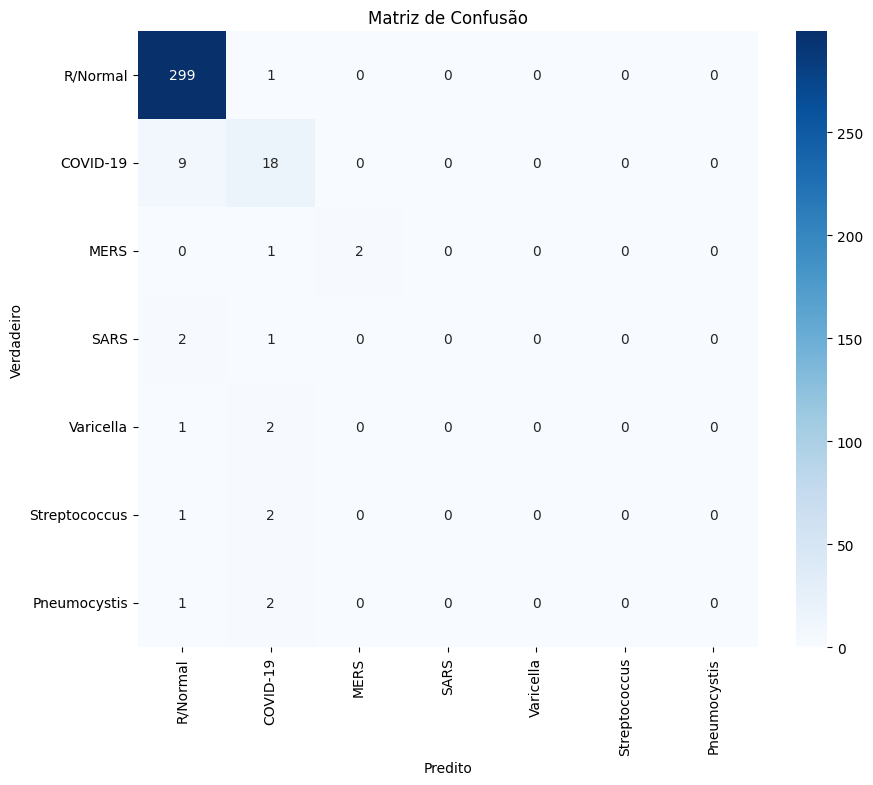

In [20]:
y_pred = model.predict(X_test_anova)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Nomes das classes (ajuste conforme necessário)
class_names = [
    "R/Normal", "COVID-19", "MERS", "SARS", 
    "Varicella", "Streptococcus", "Pneumocystis"
]

# Plotando a Matriz de Confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")

plt.show()


Análise Rápida da Matriz
R/Normal:
Previu corretamente 294 casos (excelente precisão).
Confundiu 3 vezes com COVID-19, e poucas vezes com outras classes (2 erros menores).
COVID-19:
Identificou 17 de 27 casos corretamente, mas teve 10 falsos negativos classificados como normais.
Outras classes (MERS, SARS, Varicella, Streptococcus, Pneumocystis):
O modelo teve dificuldade em detectar essas classes devido ao pouco suporte (apenas 3 amostras para cada).
Em alguns casos, a classe SARS e Varicella não foram identificadas corretamente.

Análise por Métricas
Accuracy (Acurácia):

O modelo obteve 92% de acurácia (número de predições corretas no geral). Isso é bom, mas pode mascarar problemas para classes minoritárias.
Precision (Precisão):

Mede quantas das predições para uma classe estavam corretas.
R/Normal: 0.96 (excelente)
COVID-19: 0.65 (mediano; pode ser melhorado)
SARS e Varicella: 0.00 (nenhuma amostra foi corretamente prevista para essas classes).
Recall (Sensibilidade):

Mede quantas amostras de uma classe foram corretamente identificadas.
R/Normal: 0.98 (ótimo)
COVID-19: 0.63 (perdeu algumas amostras)
SARS e Varicella: 0.00 (nenhuma amostra foi corretamente identificada).
F1-Score:

A média harmônica entre precisão e recall, útil para avaliar classes desbalanceadas.
COVID-19: 0.64 (precisa melhorar)
SARS, Varicella: 0.00 (indicando que o modelo não conseguiu aprender nada relevante para essas classes).
Macro avg e Weighted avg:

Macro avg: Média simples entre todas as classes, independente do número de amostras. Valor baixo (0.55) indica que o modelo foi mal para as classes minoritárias.
Weighted avg: Média ponderada pelo número de amostras em cada classe, mostrando um desempenho melhor (0.91) devido ao bom desempenho na classe dominante (R/Normal).


3. Problemas Identificados
Classes minoritárias: SARS e Varicella não foram bem identificadas, provavelmente devido ao pequeno número de amostras.
Desbalanceamento: Embora o SMOTE tenha ajudado no treinamento, o modelo ainda tem dificuldades em prever corretamente algumas classes raras.

4. Possíveis Melhorias
Mais Dados: Se possível, aumentar a quantidade de amostras para as classes minoritárias.
Ajustar o SMOTE: Aumentar a taxa de amostras sintéticas para as classes com poucas ocorrências.
Experimentar outros Modelos: Testar outros classificadores, como XGBoost ou SVM, para melhorar a capacidade de separação.
Ajustar Hiperparâmetros: Melhorar o desempenho ajustando hiperparâmetros do modelo RandomForest.
Estratégias de Métricas Balanceadas: Utilizar estratégias de balanceamento de classe (como ponderação de perda no RandomForest).
